In [1]:
# import stuff
import os,sys
import glob
import pandas
from osgeo import gdal
import datetime 
from datetime import datetime
from datetime import timedelta
from dateutil import parser
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle
%matplotlib  widget

In [2]:
# set the driver first, only do once.
driver=gdal.GetDriverByName('ISCE')
demDir = '/data/ocp4/LagunaSalada/Data_and_Figs/cropped_9000_1800_18000_3600/geom_reference'

# size of full res SLCs (same as DEM)
dxIN=18000
dyIN=3600

file = demDir+'/hgt.rdr.full'
ds = gdal.Open(file,gdal.GA_ReadOnly)
elev = ds.GetRasterBand(1).ReadAsArray(0,0,dxIN,dyIN)

print('DEM loaded.')

DEM loaded.


In [3]:
# make a bounding box to figure out the region to extract 
box = np.zeros((5,2))
x1 = 17000; x2 = 14000
y1 = 1750;  y2 = 1000

# larger cropped region
x1 = 18000
y1 = 2100

box[0] = [x1,y1]; box[1] = [x2,y1]
box[2] = [x2,y2]; box[3] = [x1,y2]
box[4] = box[0]

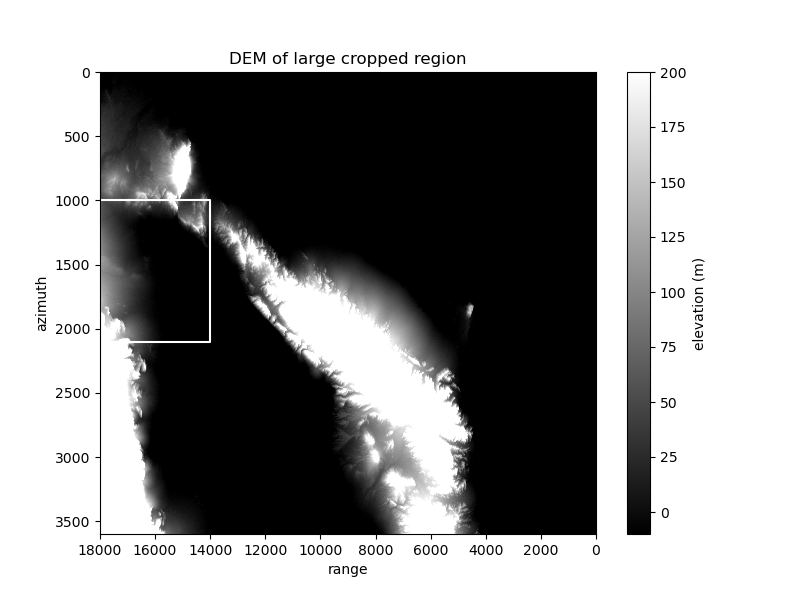

In [4]:
plt.figure(figsize=(8,6))
plt.imshow(elev, cmap='gray',vmin=-10,vmax=200, aspect='auto',interpolation='none')
plt.plot(box[:,0],box[:,1],'w-')
plt.xlim(dxIN, 0)
plt.xlabel('range')
plt.ylabel('azimuth')
plt.title('DEM of large cropped region')
plt.colorbar(label='elevation (m)')
plt.show()

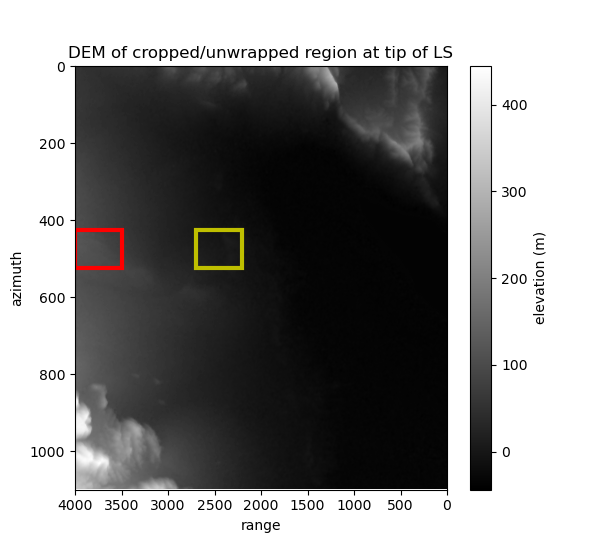

In [9]:
elev_cropped = elev[y2:y1,x2:x1]

box1x = [3500, 4000];  box1dx = box1x[1]-box1x[0]
box1y = [425, 525];   box1dy = box1y[1]-box1y[0]

box4x = [2200, 2700];  box4dx = box4x[1]-box4x[0]
box4y = [425, 525];   box4dy = box4y[1]-box4y[0]

plt.figure(figsize=(6,5.5))
plt.imshow(elev_cropped, cmap='gray',aspect='auto')
plt.xlim(x1-x2, 0)
plt.gca().add_patch(Rectangle((box1x[0],box1y[0]),box1dx,box1dy,edgecolor='r',facecolor='none',lw=3,label='box1'))
plt.gca().add_patch(Rectangle((box4x[0],box4y[0]),box4dx,box4dy,edgecolor='y',facecolor='none',lw=3,label='box4'))
plt.xlabel('range')
plt.ylabel('azimuth')
plt.title('DEM of cropped/unwrapped region at tip of LS')
plt.colorbar(label='elevation (m)')
plt.show()

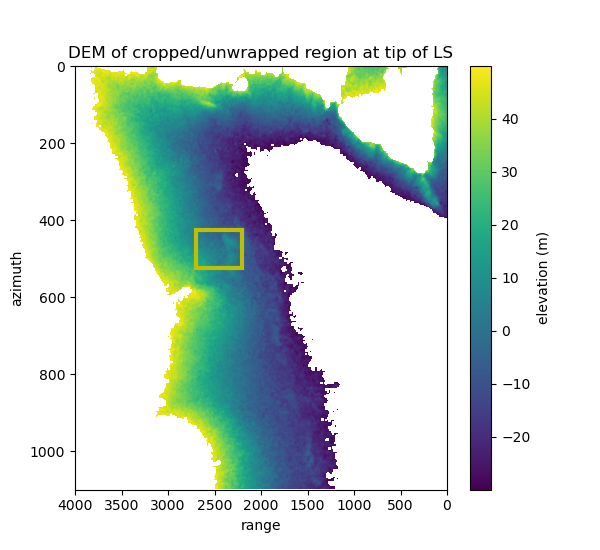

In [10]:
elev_masked = np.ma.masked_where(elev_cropped<-30,elev_cropped)
elev_masked = np.ma.masked_where(elev_masked>50,elev_masked)

plt.figure(figsize=(6,5.5))
plt.imshow(elev_masked, cmap='viridis',aspect='auto')
plt.xlim(x1-x2, 0)
plt.gca().add_patch(Rectangle((box4x[0],box4y[0]),box4dx,box4dy,edgecolor='y',facecolor='none',lw=3,label='box4'))
plt.xlabel('range')
plt.ylabel('azimuth')
plt.title('DEM of cropped/unwrapped region at tip of LS')
plt.colorbar(label='elevation (m)')
plt.show()

In [7]:
print(np.min(elev_cropped))

-43.62655806329007
